In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
train_dataset = torchvision.datasets.CIFAR10(root='.', train=True, transform=transforms.ToTensor(), download=True)

Files already downloaded and verified


In [3]:
test_dataset = torchvision.datasets.CIFAR10(root='.', train=False, transform=transforms.ToTensor(), download=True)

Files already downloaded and verified


In [4]:
# behaves differently from MNIST / Fashion MNIST
# it is a NumPy array, not a PyTorch tensor
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
# we are working with color images now!
train_dataset.data.shape

(50000, 32, 32, 3)

In [6]:
# behaves differently from MNIST / Fashion MNIST
# it is a list!
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [7]:
# number of classes
K = len(set(train_dataset.targets))
print('number of classes: ', K)

number of classes:  10


In [8]:
# Data Loader
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# the data transformer mapped the data to (0, 1) and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)

for x,y in tmp_loader:
    print(x)
    print(x.shape)
    break

tensor([[[[0.9176, 0.7608, 0.7137,  ..., 0.9451, 0.9843, 0.9804],
          [0.8824, 0.7765, 0.7098,  ..., 0.8980, 0.9294, 0.9490],
          [0.7725, 0.7176, 0.7137,  ..., 0.6471, 0.5686, 0.6745],
          ...,
          [0.9020, 0.8980, 0.8980,  ..., 0.8588, 0.8431, 0.8157],
          [0.9490, 0.9373, 0.9216,  ..., 0.8588, 0.8157, 0.8235],
          [0.9529, 0.9451, 0.9216,  ..., 0.8588, 0.8314, 0.8235]],

         [[0.9294, 0.7725, 0.7098,  ..., 0.9451, 0.9843, 0.9804],
          [0.8784, 0.7765, 0.7020,  ..., 0.9020, 0.9333, 0.9569],
          [0.7490, 0.7020, 0.6902,  ..., 0.6588, 0.5882, 0.6941],
          ...,
          [0.8588, 0.8627, 0.8667,  ..., 0.7843, 0.7804, 0.7647],
          [0.8431, 0.8824, 0.8980,  ..., 0.7569, 0.7176, 0.7412],
          [0.8196, 0.8353, 0.8706,  ..., 0.7216, 0.6980, 0.7020]],

         [[0.9294, 0.7765, 0.6980,  ..., 0.9529, 0.9843, 0.9765],
          [0.8627, 0.7686, 0.6745,  ..., 0.9098, 0.9333, 0.9451],
          [0.7137, 0.6706, 0.6627,  ..., 0

In [10]:
# Define the model
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        
        # define the conv layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        
        # define the linear layers
        self.fc1 = nn.Linear(128*3*3, 1024)
        self.fc2 = nn.Linear(1024, K)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 128*3*3)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2)
        x = self.fc2(x)
        return x

In [11]:
# Instantiate the model
model = CNN(K)

In [12]:
device = torch.device('cuda:0')
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [13]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [14]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    
    for i in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()
            
            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # backward and optimize
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
            
        # Get train loss and test loss
        train_loss = np.mean(train_losses)
        
        test_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        
        # Save losses
        train_losses[i] = train_loss
        test_losses[i] = test_loss
        
        dt = datetime.now() - t0
        print(f'Epoch {i+1}/{epochs}, Train Loss: {train_loss:.4f}, \ Test Loss: {test_loss:.4f}, Duration: {dt}')
    
    return train_losses, test_losses

In [15]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 0.0000, \ Test Loss: 1.4889, Duration: 0:00:40.101203
Epoch 2/15, Train Loss: 0.0000, \ Test Loss: 1.3137, Duration: 0:00:35.546585
Epoch 3/15, Train Loss: 0.0000, \ Test Loss: 1.2387, Duration: 0:00:35.868818
Epoch 4/15, Train Loss: 0.0000, \ Test Loss: 1.1441, Duration: 0:00:38.131261
Epoch 5/15, Train Loss: 0.0000, \ Test Loss: 1.0612, Duration: 0:00:43.729562
Epoch 6/15, Train Loss: 0.0000, \ Test Loss: 0.9956, Duration: 0:00:38.529931
Epoch 7/15, Train Loss: 0.0000, \ Test Loss: 0.9681, Duration: 0:00:40.370935
Epoch 8/15, Train Loss: 0.0000, \ Test Loss: 0.9262, Duration: 0:00:43.047078
Epoch 9/15, Train Loss: 0.0000, \ Test Loss: 0.9212, Duration: 0:00:38.205744
Epoch 10/15, Train Loss: 0.0000, \ Test Loss: 0.8475, Duration: 0:00:37.886939
Epoch 11/15, Train Loss: 0.0000, \ Test Loss: 0.7933, Duration: 0:00:37.502178
Epoch 12/15, Train Loss: 0.0000, \ Test Loss: 0.7764, Duration: 0:00:35.929185
Epoch 13/15, Train Loss: 0.0000, \ Test Loss: 0.7681, Duratio

In [16]:
def my_random_generator():
    for _ in range(10):
        x = np.random.randn()
        yield x

In [18]:
list(my_random_generator())

[0.38635812976083417,
 0.9567722552369513,
 1.5472330225802633,
 -0.2624932093417518,
 1.0767482825957675,
 0.3085955335871543,
 -0.576263840941888,
 0.5387960518395939,
 0.8216711213025909,
 0.1045466372271722]

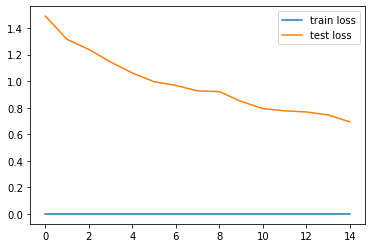

In [19]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [20]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    
    # forward pass
    outputs = model(inputs)
    
    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)
    
    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    
    # forward pass
    outputs = model(inputs)
    
    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)
    
    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f'Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}')

Train accuracy: 0.7504, Test accuracy: 0.6631


In [21]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Confusion Matrix is Normalized')
    else:
        print('Confusion Matrix was normalized before')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

Confusion Matrix was normalized before
[[694  28  64  14  22   4  18  14  89  53]
 [ 25 766   9   5   7   3  16   7  21 141]
 [ 69   8 547  59 125  50  77  38  13  14]
 [ 16  19 106 429  96 147 103  49  12  23]
 [ 18   3  75  43 645  23  84  88  13   8]
 [ 11  10  91 175  74 480  65  74  13   7]
 [ 11   9  41  46  35  19 814  10   7   8]
 [ 10   5  36  34  86  51  24 724   6  24]
 [ 92  71  16  11  16   7   9   7 744  27]
 [ 32  89  11  12   9   8  18  22  27 772]]


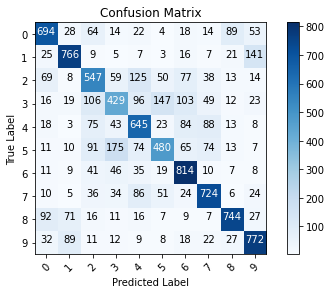

In [22]:
# get all predictions in an array and plot confusion matrix
x_test = test_dataset.data
y_test = test_dataset.targets
p_test = np.array([])
for inputs, targets in test_loader:
    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)
    
    # forward pass
    outputs = model(inputs)
    
    # Get prediction
    _, predictions = torch.max(outputs, 1)
    
    # update p_test
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))
    
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split('\n')

Text(0.5, 1.0, 'True Label: horse || Predicted: dog')

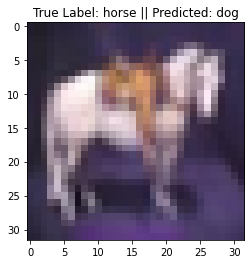

In [24]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title('True Label: %s || Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))swell